## **Logistic Regression**

### Importing all the required libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

## Loading Iris Dataset

In [2]:
df = sns.load_dataset('iris')
df.head
#we will predict species cloumn by using other columns

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

## Unique Values

In [3]:
# to find unique values of species
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Null Values

In [4]:
#to check if there is any null value
df.isnull().sum()

#df.isnull() is to see all the places where value is null

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


## Removing Setosa for Binary Classification

In [6]:
# as we are using binary classification for the logistic reg in this notebook so we will remove setosa
df['species'] != 'setosa'

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: species, Length: 150, dtype: bool

In [7]:
df=df[df['species'] != 'setosa']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


## Converting Names into numbers

In [8]:
#convertin species name into any number like 0 or 1
df['species'].map({'versicolor':0 , 'virginica':1})

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

In [9]:
#convertin species name into any number like 0 or 1
#df['species'].map({'versicolor':0 , 'virginica':1})
#df['species'] = df['species'].map({'versicolor':0 , 'virginica':1})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


## Assigning data into dependent and independent variables

In [10]:
#split data into dependent and independent variable features
x=df.iloc[:,:-1] #last vale ko cod ke sab - sepal_length	sepal_width	petal_length	petal_width
y=df.iloc[:,-1] #keval last vala - species

In [11]:
x

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y

50     versicolor
51     versicolor
52     versicolor
53     versicolor
54     versicolor
          ...    
145     virginica
146     virginica
147     virginica
148     virginica
149     virginica
Name: species, Length: 100, dtype: object

## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

## Importing Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

## Parameters

In [15]:
from sklearn.model_selection import GridSearchCV
#parameters are always written in dictionary format
#we can use multiple parameters according to our choice
parameters = {'penalty' : ['11' , 'l2' , 'elasticnet'] , 'C' : [1,2,3,4,5,6,7,8,10,20,30,40,50], 'max_iter' : [100 , 200 , 300 , 400 , 500]}

## GridSearchCV

In [16]:
#in () , the first element is estimator that is model name that is classifier
# second is param_grid , in which we have the parameters
#third is scoring which is accuracy in classification problems, in regression problem we use mean sq error
#fourth is cross validation

GridSearchCV(classifier , param_grid= parameters , scoring= 'accuracy', cv=5)
classifier_regressor = GridSearchCV(classifier , param_grid= parameters , scoring= 'accuracy', cv=5)

## Fitting data

In [17]:
classifier_regressor.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
650 fits failed out of a total of 975.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
325 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skl

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['11', 'l2', 'elasticnet']},
             scoring='accuracy')

## Best Parameters

In [18]:
#checking which parameter is selected
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


## Best Score

In [19]:
#checking the accuracy score
print(classifier_regressor.best_score_)

0.9733333333333334


## Prediction

In [20]:
#prediction
classifier_regressor.predict(x_test)
y_pred = classifier_regressor.predict(x_test)

## Accuracy Score

In [21]:
#accuracy score
from sklearn.metrics import accuracy_score, classification_report

In [22]:
score = accuracy_score(y_pred,y_test)
print(score)

0.92


## Classification Report

In [23]:
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

  versicolor       0.93      0.93      0.93        14
   virginica       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



#**Extra**

##EDA

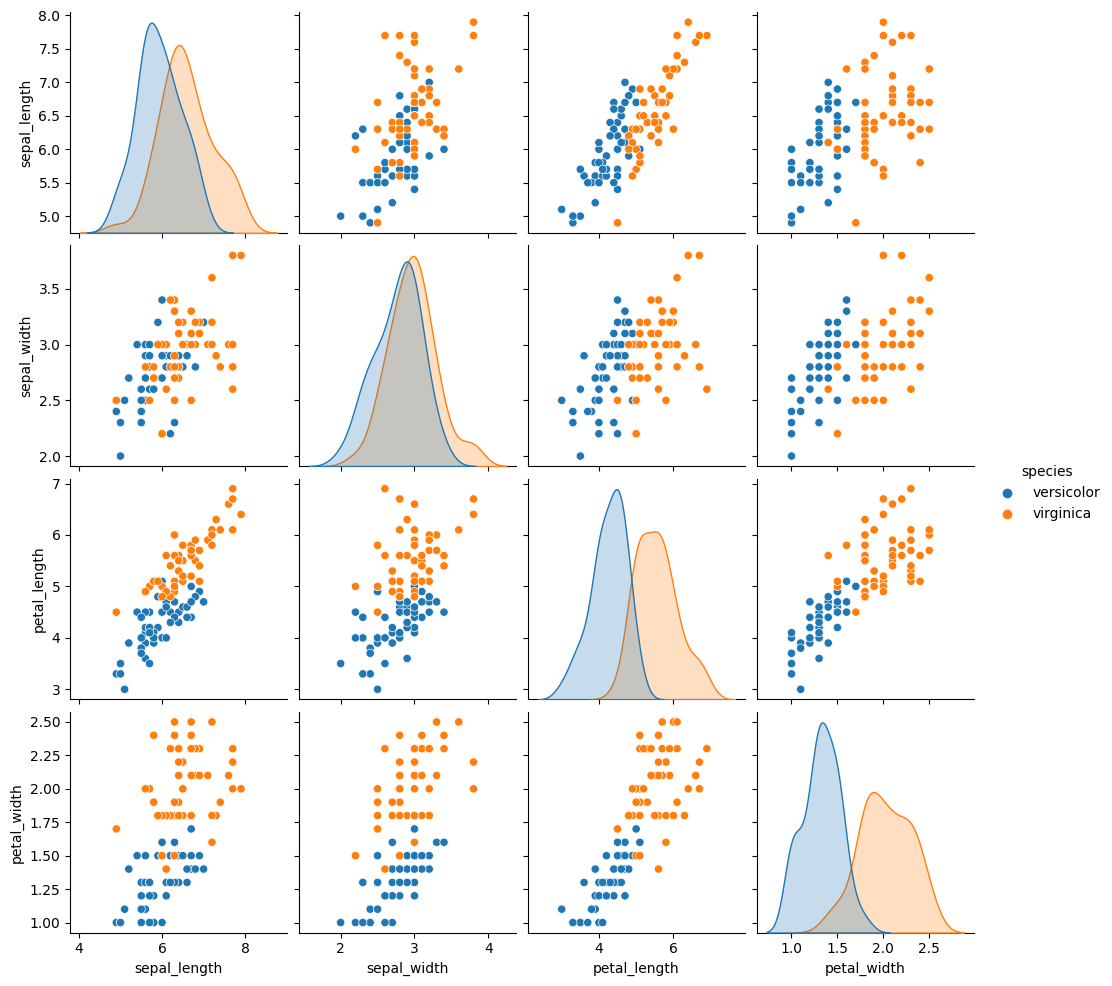

In [24]:
##EDA
# in hue parameter we have categories
sns.pairplot(df, hue = 'species')

In [25]:
#to see the correlation
df.corr()

<ipython-input-25-1f85eea6a015>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.553855,0.828479,0.593709
sepal_width,0.553855,1.000000,0.519802,0.566203
petal_length,0.828479,0.519802,1.000000,0.823348
petal_width,0.593709,0.566203,0.823348,1.000000
